In [1]:
!pip -q install ultralytics==8.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00:00:0100:01


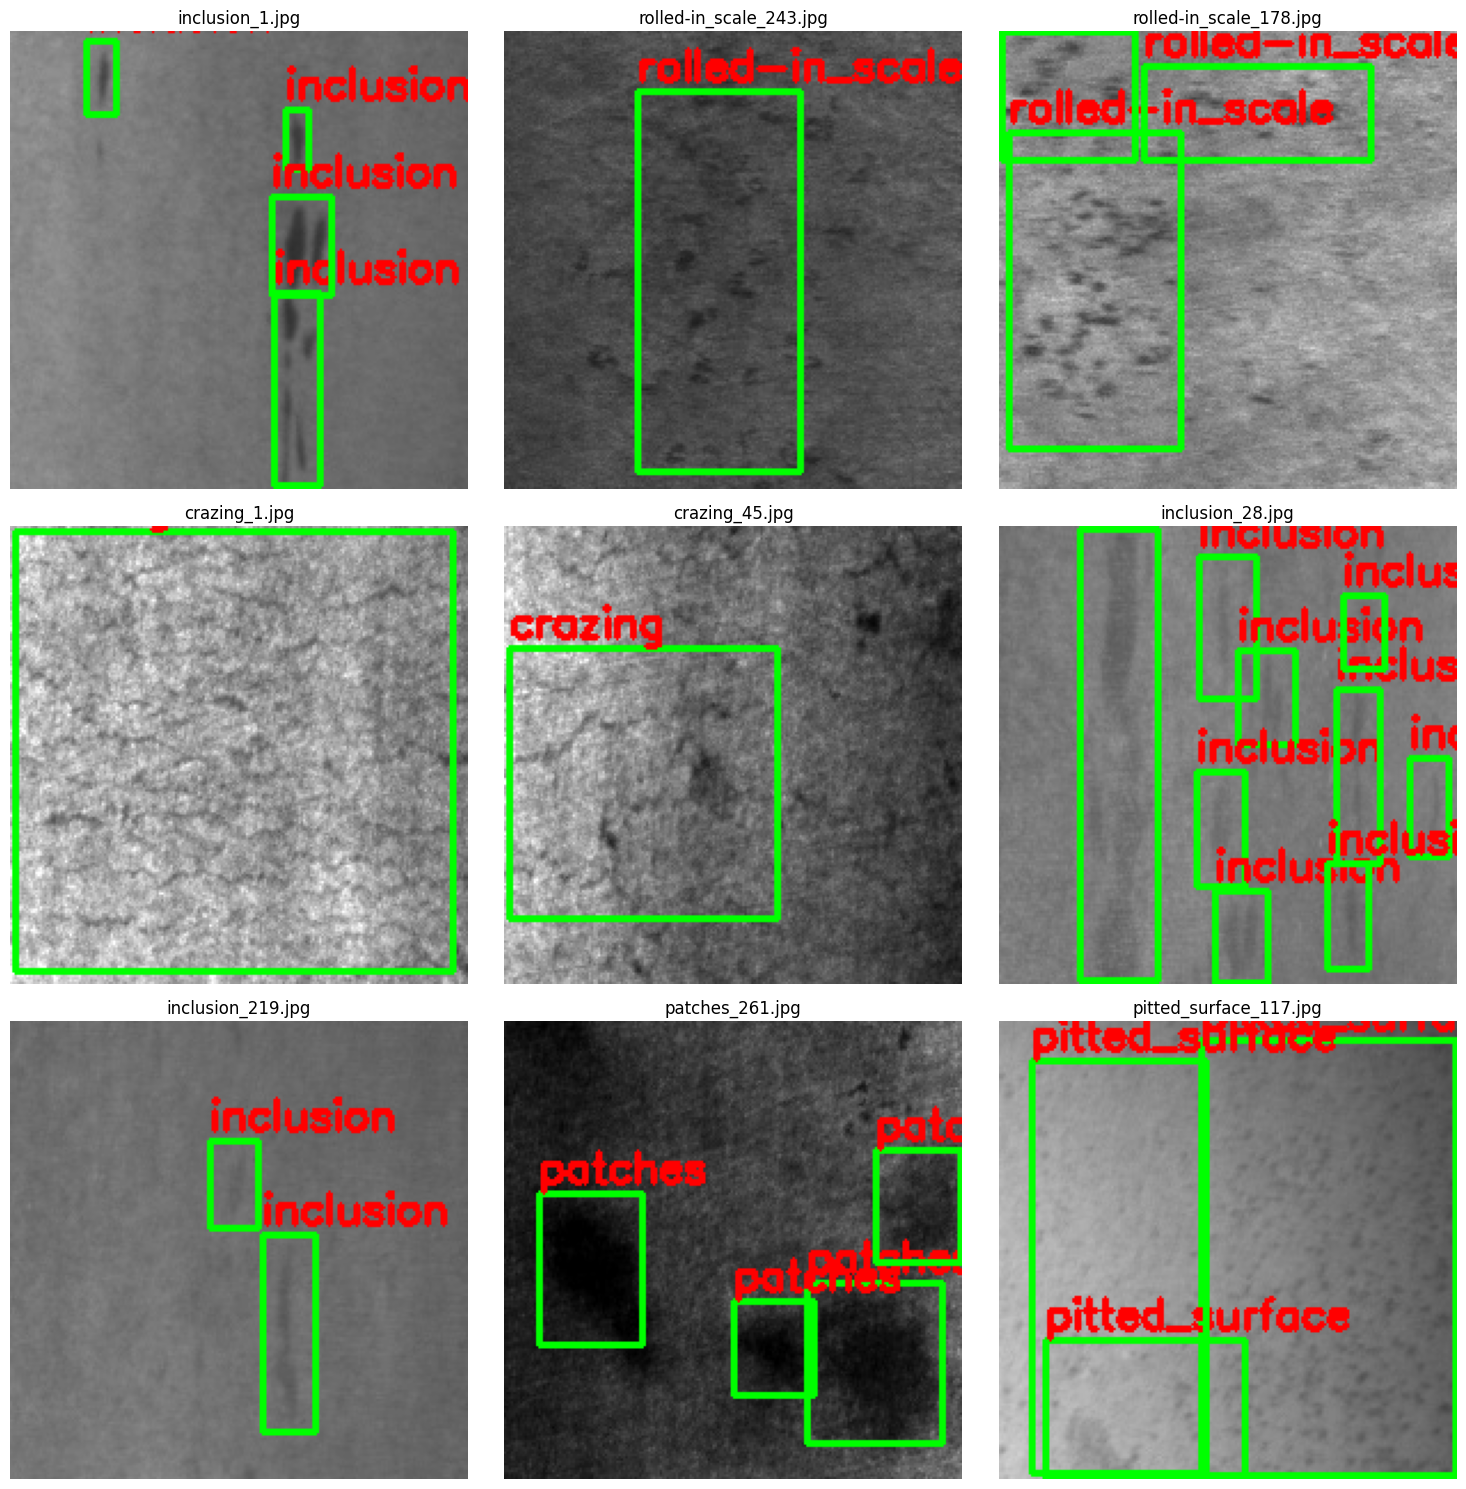

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
# เปลี่ยน path ให้ตรงกับ Dataset ของคุณ
IMG_DIR = "/kaggle/input/neu-det-data-of-rm/train/images"
LABEL_DIR = "/kaggle/input/neu-det-data-of-rm/train/labels"
CLASSES = ["crazing", "inclusion", "patches", "pitted_surface", "rolled-in_scale", "scratches"]
# ----------------------------

# โหลดชื่อไฟล์ภาพทั้งหมด (แค่ 9 รูปแรก)
img_files = [f for f in os.listdir(IMG_DIR) if f.endswith(('.jpg', '.png'))][:9]

# วาดภาพ
plt.figure(figsize=(15, 15))
for i, img_file in enumerate(img_files):
    img_path = os.path.join(IMG_DIR, img_file)
    label_path = os.path.join(LABEL_DIR, os.path.splitext(img_file)[0] + ".txt")
    
    # โหลดภาพ
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # วาดกรอบจาก label
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                cls_id = int(parts[0])
                x, y, bw, bh = map(float, parts[1:])
                # แปลง YOLO -> pixel
                x1 = int((x - bw/2) * w)
                y1 = int((y - bh/2) * h)
                x2 = int((x + bw/2) * w)
                y2 = int((y + bh/2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
                cv2.putText(img, CLASSES[cls_id], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    # Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import os, yaml
os.environ["WANDB_DISABLED"] = "true"

BASE_DIR = "/kaggle/input/neu-det-data-of-rm"  # ปรับได้
# อ่านรายชื่อคลาสจาก classes.txt
classes_txt = os.path.join(BASE_DIR, "classes.txt")
if os.path.isfile(classes_txt):
    with open(classes_txt, "r", encoding="utf-8") as f:
        names = [ln.strip() for ln in f if ln.strip()]
else:
    # ถ้าไม่มี ใส่ชื่อชั่วคราว
    names = ["crazing","inclusion","patches","pitted_surface","rolled-in_scale","scratches"]

data_yaml = {
    "path": BASE_DIR,
    "train": "/kaggle/input/neu-det-data-of-rm/train/images",
    "val":   "/kaggle/input/neu-det-data-of-rm/val/images",
    "test":  "/kaggle/input/neu-det-data-of-rm/test/images",
    "names": names,
}
with open("data_v8s.yaml", "w", encoding="utf-8") as f:
    yaml.safe_dump(data_yaml, f, allow_unicode=True)
print("data_v8s.yaml written with classes:", names)


data_v8s.yaml written with classes: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [4]:
!pip install -U ultralytics
!pip uninstall -y wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.0
    Uninstalling ultralytics-8.3.0:
      Successfully uninstalled ultralytics-8.3.0
Found existing installation: wandb 0.20.1
Uninstalling wandb-0.20.1:
  Successfully uninstalled wandb-0.20.1


In [5]:
# 1) ลบผลลัพธ์รันเดิมทิ้ง (กันชนกับไฟล์เดิม)
!rm -rf /kaggle/working/runs_yolo8/baseline_y8n

# 2) ถอน polars เพื่อบังคับให้ Ultralytics fallback ไปใช้ pandas
!pip uninstall -y polars
!pip uninstall -y ray


Found existing installation: polars 1.21.0
Uninstalling polars-1.21.0:
  Successfully uninstalled polars-1.21.0
Found existing installation: ray 2.47.1
Uninstalling ray-2.47.1:
  Successfully uninstalled ray-2.47.1


In [8]:
# 1) ติดตั้ง polars เวอร์ชันที่เข้ากันได้กับ Kaggle
!pip uninstall -y polars
!pip install "polars>=1.20,<1.22"

# (ไม่บังคับ) ลบรันเดิม กันไฟล์ results.csv เก่าชน
!rm -rf /kaggle/working/runs_yolo8/baseline_y8n


Found existing installation: polars 1.33.1
Uninstalling polars-1.33.1:
  Successfully uninstalled polars-1.33.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 62.9 MB/s eta 0:00:00:00:0100:01


In [9]:

!WANDB_DISABLED=true yolo detect train data=/kaggle/working/data_v8s.yaml model=yolov8n.pt imgsz=640 epochs=300 batch=16 \
  cos_lr=True lr0=0.0025 weight_decay=0.0005 close_mosaic=10 seed=42 device=0 \
  project=runs_yolo8 name=baseline_y8n exist_ok=True


Ultralytics 8.3.199 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/data_v8s.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0025, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_y8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [11]:
import os
import zipfile

def zip_directory(path_to_zip, zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(path_to_zip):
            for file in files:
                # Create a path relative to the directory being zipped
                rel_path = os.path.relpath(os.path.join(root, file), path_to_zip)
                zipf.write(os.path.join(root, file), arcname=rel_path)

# Example usage:
# Assuming you have a folder named 'my_folder_to_zip' in the same directory
zip_directory('/kaggle/working/runs_yolo8/baseline_y8n', 'neu_det_yolov8s.zip')